CO2 Emissions

Objective: predict CO2 emissions based on model characteristics. Each car model has categorical characteristics, such as the make and fuel type, as well as numerical characteristics, such as fuel efficiency.


Import required modules

We will be focusing on training the model using the below algorithms:

*   LinearRegression
*   RandomForestRegressor
*   DecisionTreeRegressor


Preprocessing of the data will be required as we aim to use the quantitave and qualitative data.





**Data Analysis**

In [ ]:
sns.set(color_codes= True)
train_data = data2021
train_data.head()

,Model,Make,CarModel,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Smog Rating,CO2 Emissions (g/km)
0,2021,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,3,199
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,3,256
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,6,232
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,6,242
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,7,230


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model                              935 non-null    int64  
 1   Make                               935 non-null    object 
 2   CarModel                           935 non-null    object 
 3   Vehicle Class                      935 non-null    object 
 4   Engine Size (L)                    935 non-null    float64
 5   Cylinders                          935 non-null    int64  
 6   Transmission                       935 non-null    object 
 7   Fuel Type                          935 non-null    object 
 8   Fuel Consumption City (L/100 km)   935 non-null    float64
 9   Fuel Consumption Hwy (L/100 km)    935 non-null    float64
 10  Fuel Consumption Comb (L/100 km)   935 non-null    float64
 11  Smog Rating                        935 non-null    int64  

In [ ]:
train_data.columns

Index(['Model', 'Make', 'CarModel', 'Vehicle Class', 'Engine Size (L)',
       'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)',
       'Fuel Consumption Comb (L/100 km) ', 'Smog Rating',
       'CO2 Emissions (g/km)'],
      dtype='object')

In [ ]:
train_data.isnull().sum()

Model                                0
Make                                 0
CarModel                             0
Vehicle Class                        0
Engine Size (L)                      0
Cylinders                            0
Transmission                         0
Fuel Type                            0
Fuel Consumption City (L/100 km)     0
Fuel Consumption Hwy (L/100 km)      0
Fuel Consumption Comb (L/100 km)     0
Smog Rating                          0
CO2 Emissions (g/km)                 0
dtype: int64

In [ ]:
train_data.shape

(935, 13)

In [ ]:
train_data['Make'].nunique()

38

In [ ]:
train_data['Make'].unique()

array(['Acura', 'Alfa Romeo', 'Aston Martin', 'Audi', 'Bentley', 'BMW',
       'Bugatti', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge',
       'FIAT', 'Ford', 'Genesis', 'GMC', 'Honda', 'Hyundai', 'Infiniti',
       'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Lexus', 'Lincoln',
       'Maserati', 'Mazda', 'Mercedes-Benz', 'MINI', 'Mitsubishi',
       'Nissan', 'Porsche', 'Ram', 'Rolls-Royce', 'Subaru', 'Toyota',
       'Volkswagen', 'Volvo'], dtype=object)

In [ ]:
train_data['Model'].nunique()

1

In [ ]:
train_data['Model'].unique()

array([2021])

In [ ]:
train_data['Vehicle Class'].nunique()

15

In [ ]:
train_data['Vehicle Class'].unique()

array(['Compact', 'Two-seater', 'SUV: Small', 'Mid-size', 'Minicompact',
       'SUV: Standard', 'Station wagon: Small', 'Subcompact',
       'Station wagon: Mid-size', 'Full-size', 'Pickup truck: Small',
       'Pickup truck: Standard', 'Minivan', 'Van: Passenger',
       'Special purpose vehicle'], dtype=object)

In [ ]:
train_data['Transmission'].nunique()

23

In [ ]:
train_data['Transmission'].unique()

array(['AM8', 'AM9', 'AS10', 'A8', 'A9', 'M7', 'AM7', 'AS8', 'M6', 'AS6',
       'AV', 'AS9', 'A10', 'A6', 'M5', 'AV7', 'AV1', 'AM6', 'AS7', 'AV8',
       'AV6', 'AV10', 'AS5'], dtype=object)

Now since we know the frequency of each categorical variable we can therefore sort them according to our convenience. We know that the abbreviations A, AS etc are all the same group so we can classify them into bigger groups. We can name the fuel types to have better visualization

In [ ]:
train_data["Fuel Type"] = np.where(train_data["Fuel Type"]=="Z", "Premium Gasoline",train_data["Fuel Type"])
train_data["Fuel Type"] = np.where(train_data["Fuel Type"]=="X", "Regular Gasoline",train_data["Fuel Type"])
train_data["Fuel Type"] = np.where(train_data["Fuel Type"]=="D", "Diesel",train_data["Fuel Type"])
train_data["Fuel Type"] = np.where(train_data["Fuel Type"]=="E", "Ethanol(E85)",train_data["Fuel Type"])
train_data["Fuel Type"] = np.where(train_data["Fuel Type"]=="N", "Natural Gas",train_data["Fuel Type"])

Make
-------------  --
Ford           87
Chevrolet      84
Mercedes-Benz  72
Porsche        63
GMC            61
BMW            54
Toyota         49
Audi           43
Jeep           36
Mazda          29
Hyundai        27
Lexus          27
Kia            25
Honda          23
MINI           22
Nissan         22
Dodge          22
Cadillac       22
Ram            16
Volkswagen     16
Subaru         16
Volvo          13
Maserati       11
Rolls-Royce    10
Lamborghini     9
Buick           9
Bentley         8
Genesis         8
Lincoln         7
Acura           6
Alfa Romeo      6
Infiniti        6
Chrysler        6
Aston Martin    6
Jaguar          6
Mitsubishi      5
Bugatti         2
FIAT            1
-------------  --


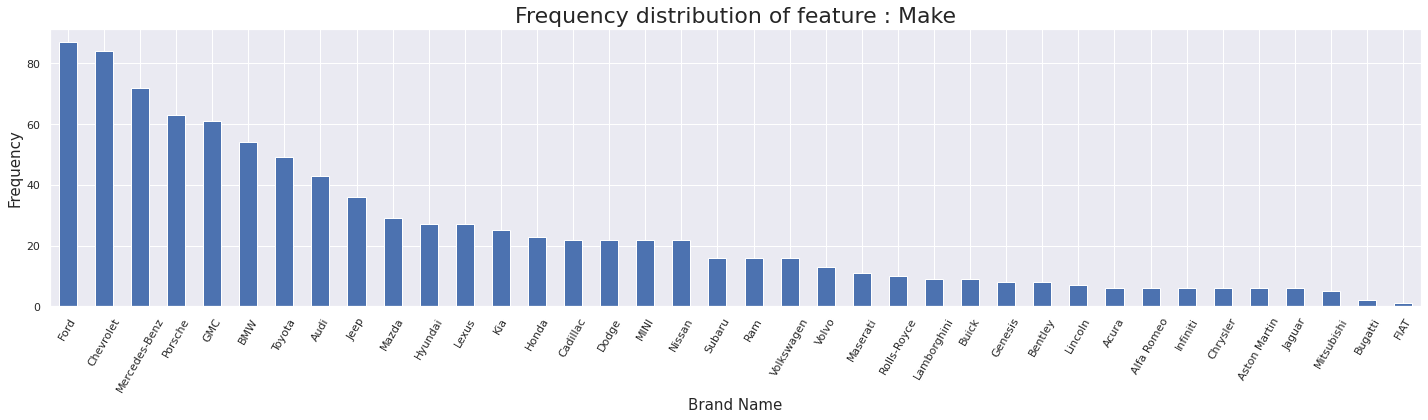

In [ ]:
from tabulate import tabulate
print("Make")
print(tabulate(pd.DataFrame(train_data.Make.value_counts())))

plt.figure(figsize=(20,6))

train_data.groupby("Make")["Make"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Frequency distribution of feature : Make", fontsize=22)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Brand Name", fontsize=15)
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'CO2 Emissions(g/km)')

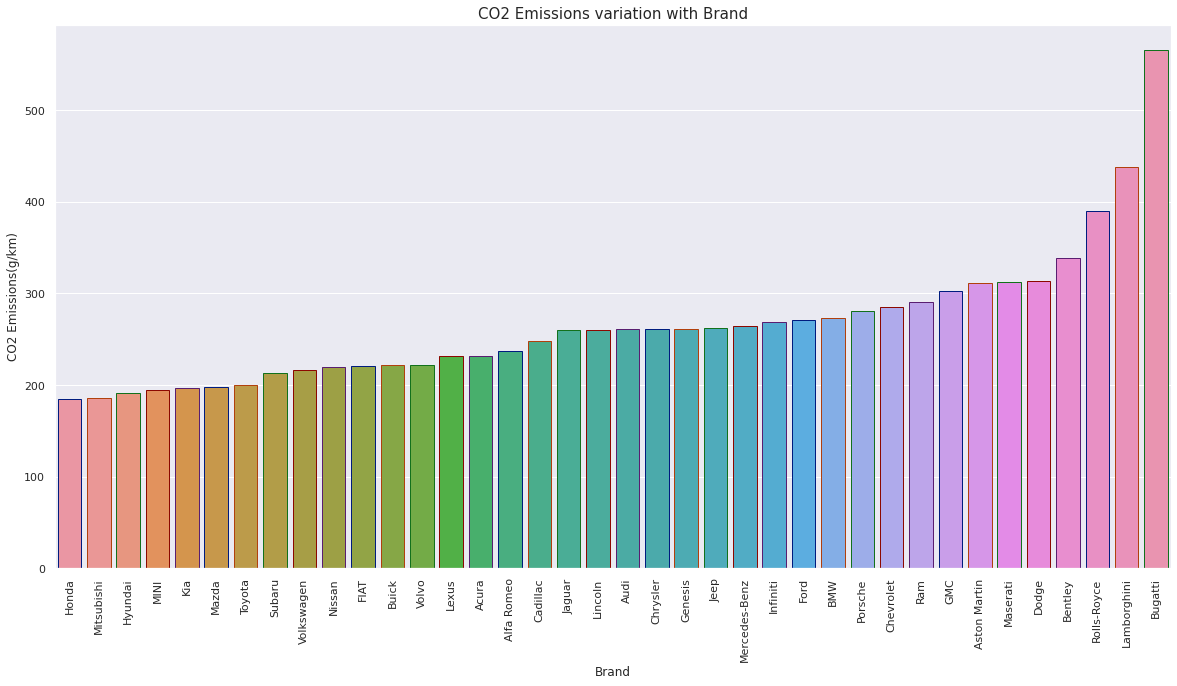

In [ ]:
orderedData= train_data.groupby(['Make'])['CO2 Emissions (g/km)'].mean().sort_values().reset_index()

plt.figure(figsize=(20,10))
sns.barplot(x = 'Make',y= 'CO2 Emissions (g/km)',data = orderedData, edgecolor=sns.color_palette("dark", 5))
plt.title('CO2 Emissions variation with Brand', fontsize=15)
plt.xlabel('Brand', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

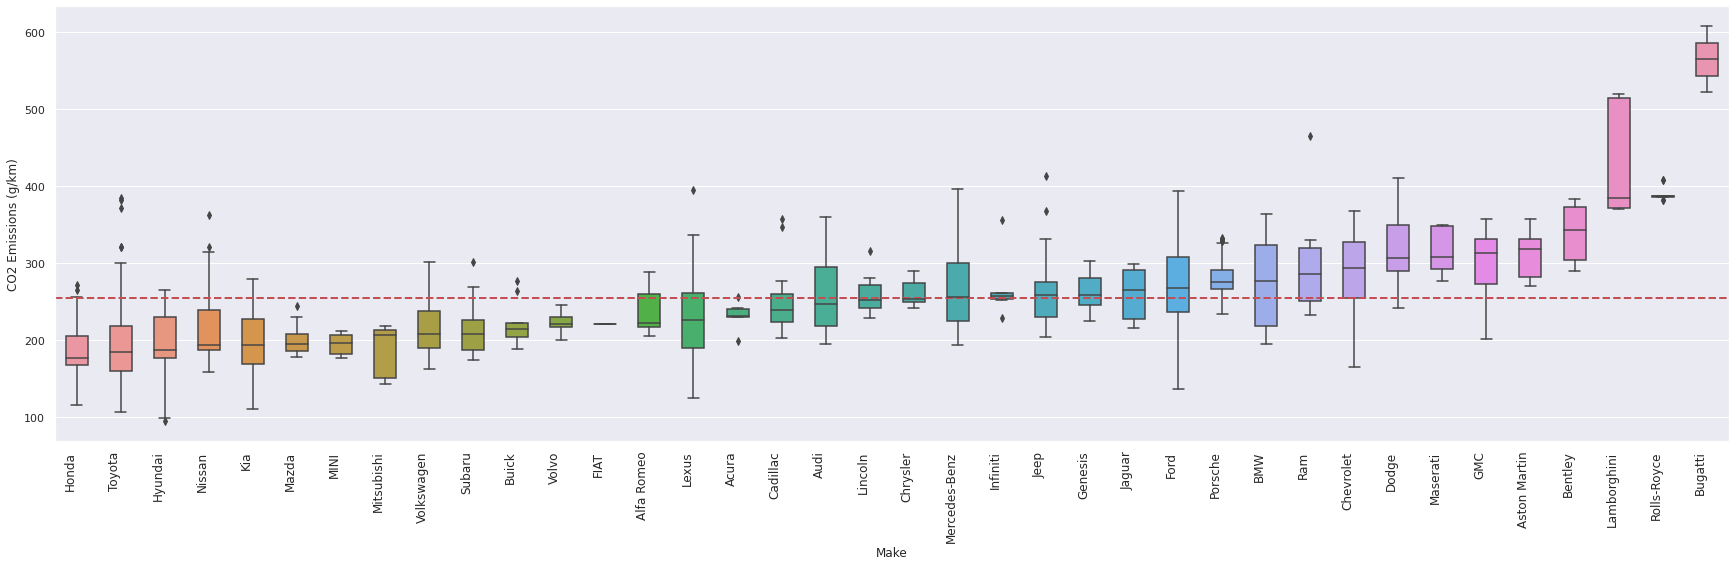

In [ ]:
plt.figure(figsize=(30,8))
#ax = sns.boxplot(train_data['Make'],train_data['CO2 Emissions(g/km)'])
order = train_data.groupby("Make")["CO2 Emissions (g/km)"].median().sort_values(ascending=True).index
ax = sns.boxplot(x='Make',y='CO2 Emissions (g/km)', data= train_data,order=order, width=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=12)
#plt.tight_layout()
plt.axhline(train_data["CO2 Emissions (g/km)"].median(),color='r',linestyle='dashed',linewidth=2)

Vehicle Class
-----------------------  ---
SUV: Small               192
SUV: Standard            127
Pickup truck: Standard   115
Mid-size                 114
Compact                   83
Subcompact                83
Full-size                 65
Two-seater                56
Minicompact               30
Station wagon: Small      20
Pickup truck: Small       17
Special purpose vehicle   13
Station wagon: Mid-size    9
Minivan                    7
Van: Passenger             4
-----------------------  ---


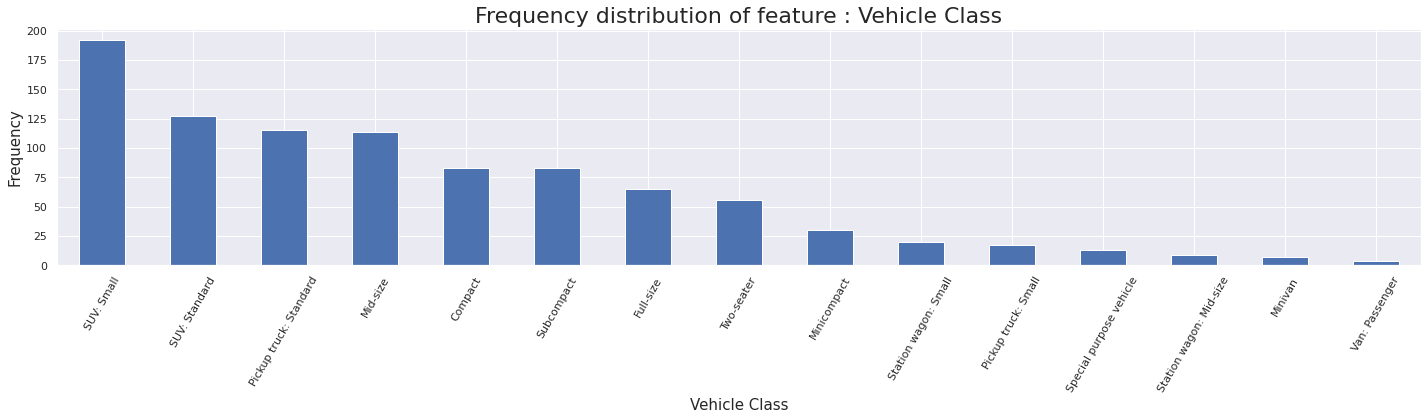

In [ ]:
print("Vehicle Class")
print(tabulate(pd.DataFrame(train_data['Vehicle Class'].value_counts())))

plt.figure(figsize=(20,6))

train_data.groupby("Vehicle Class")["Vehicle Class"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Frequency distribution of feature : Vehicle Class", fontsize=22)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Vehicle Class", fontsize=15)
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

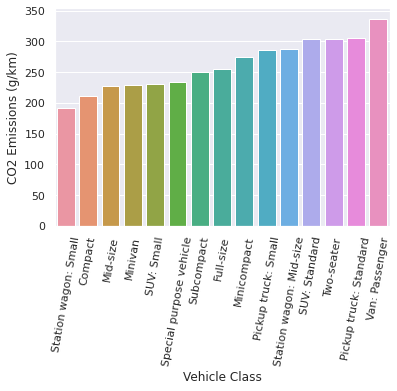

In [ ]:
OrderedData = train_data.groupby(['Vehicle Class'])['CO2 Emissions (g/km)'].mean().sort_values().reset_index()
sns.barplot(x= 'Vehicle Class',y='CO2 Emissions (g/km)',data= OrderedData)
plt.xticks(rotation=80)

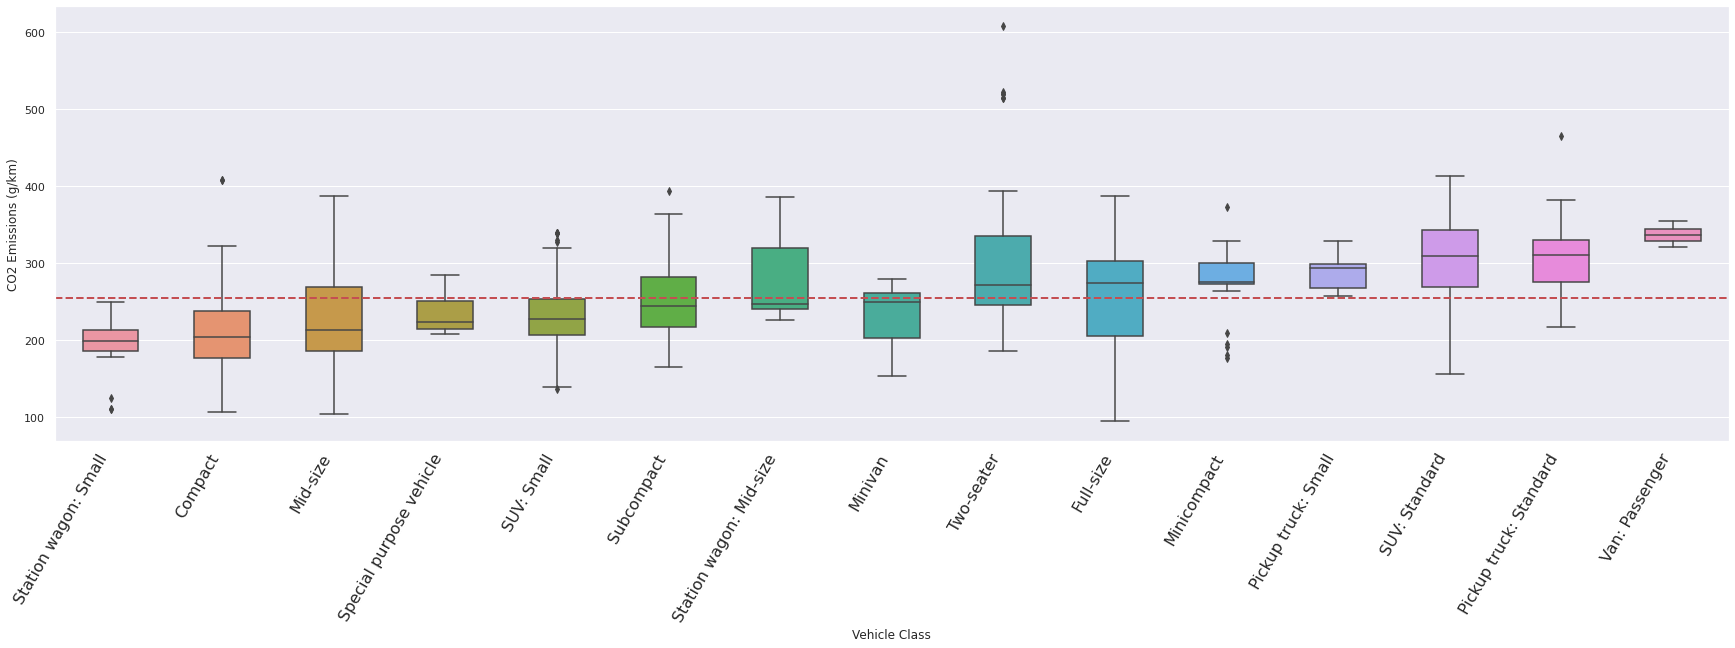

In [ ]:
plt.figure(figsize=(30,8))
#ax = sns.boxplot(train_data['Make'],train_data['CO2 Emissions(g/km)'])
order = train_data.groupby("Vehicle Class")["CO2 Emissions (g/km)"].median().sort_values(ascending=True).index
ax = sns.boxplot(x='Vehicle Class',y='CO2 Emissions (g/km)', data= train_data,order=order, width=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right",fontsize=16)
#plt.tight_layout()
plt.axhline(train_data["CO2 Emissions (g/km)"].median(),color='r',linestyle='dashed',linewidth=2)


Transmission
----  ---
AS8   206
A9     95
A8     92
AS10   77
AM7    70
M6     67
A10    59
AS6    56
AM8    44
AV     41
A6     36
AV8    15
AS9    14
AV7    11
AM6     9
M7      9
AV6     9
AS7     7
AV10    6
M5      5
AV1     4
AS5     2
AM9     1
----  ---


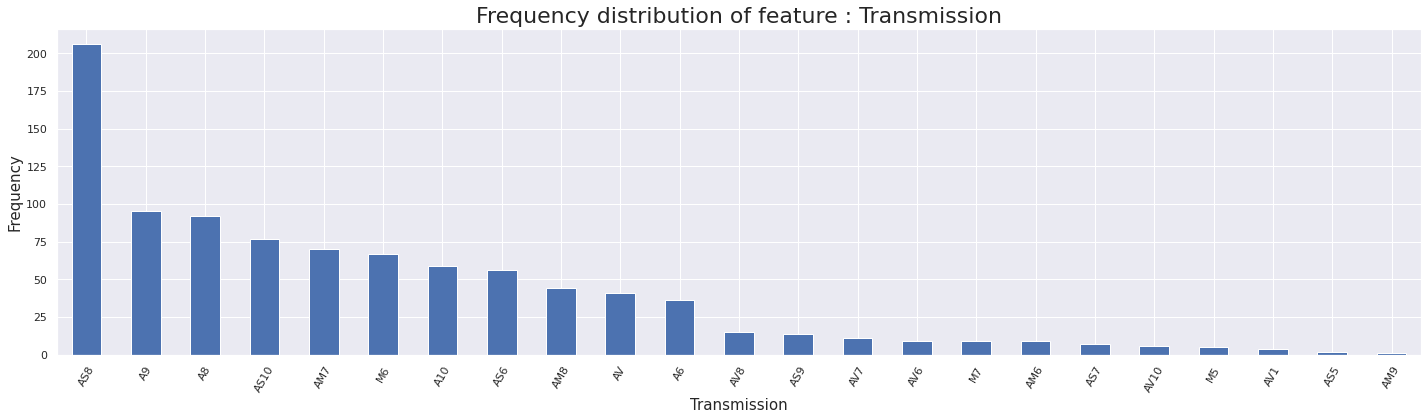

In [ ]:
print("Transmission")
print(tabulate(pd.DataFrame(train_data['Transmission'].value_counts())))

plt.figure(figsize=(20,6))

train_data.groupby("Transmission")["Transmission"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Frequency distribution of feature : Transmission", fontsize=22)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Transmission", fontsize=15)
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

Since most of these can be classified into automatic, manual etc. We will also anlayze it that way

In [ ]:
train_data["Transmission"] = np.where(train_data["Transmission"].isin(["A4", "A5", "A6", "A7", "A8", "A9", "A10"]), "Automatic",train_data["Transmission"])
train_data["Transmission"] = np.where(train_data["Transmission"].isin(["AM5", "AM6", "AM7", "AM8", "AM9"]), "Automated Manual",train_data["Transmission"])
train_data["Transmission"] = np.where(train_data["Transmission"].isin(["AS4", "AS5", "AS6", "AS7", "AS8", "AS9", "AS10"]), "Automatic with Select Shift",train_data["Transmission"])
train_data["Transmission"] = np.where(train_data["Transmission"].isin(["AV", "AV6", "AV7", "AV8", "AV10"]), "Continuously Variable",train_data["Transmission"])
train_data["Transmission"] = np.where(train_data["Transmission"].isin(["M5", "M6", "M7"]), "Manual",train_data["Transmission"])

Transmission
---------------------------  ---
Automatic with Select Shift  362
Automatic                    282
Automated Manual             124
Continuously Variable         82
Manual                        81
AV1                            4
---------------------------  ---


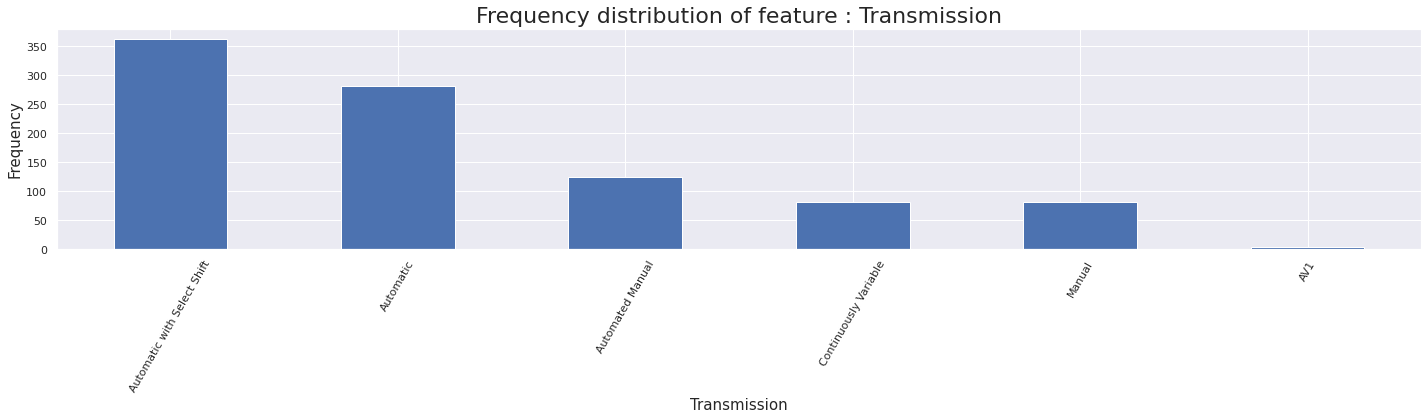

In [ ]:
print("Transmission")
print(tabulate(pd.DataFrame(train_data['Transmission'].value_counts())))

plt.figure(figsize=(20,6))

train_data.groupby("Transmission")["Transmission"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Frequency distribution of feature : Transmission", fontsize=22)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Transmission", fontsize=15)
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

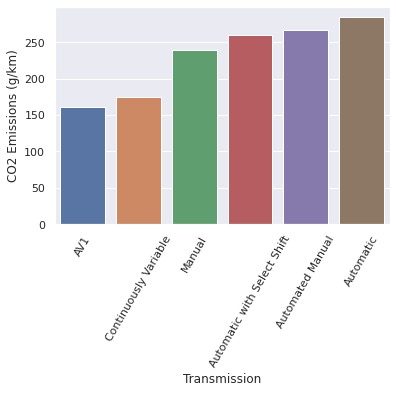

In [ ]:
OrderedData = train_data.groupby(['Transmission'])['CO2 Emissions (g/km)'].mean().sort_values().reset_index()
sns.barplot(x= 'Transmission',y='CO2 Emissions (g/km)',data= OrderedData)
plt.xticks(rotation=60)

Fuel Type
----------------  ---
Regular Gasoline  456
Premium Gasoline  438
Diesel             27
Ethanol(E85)       14
----------------  ---


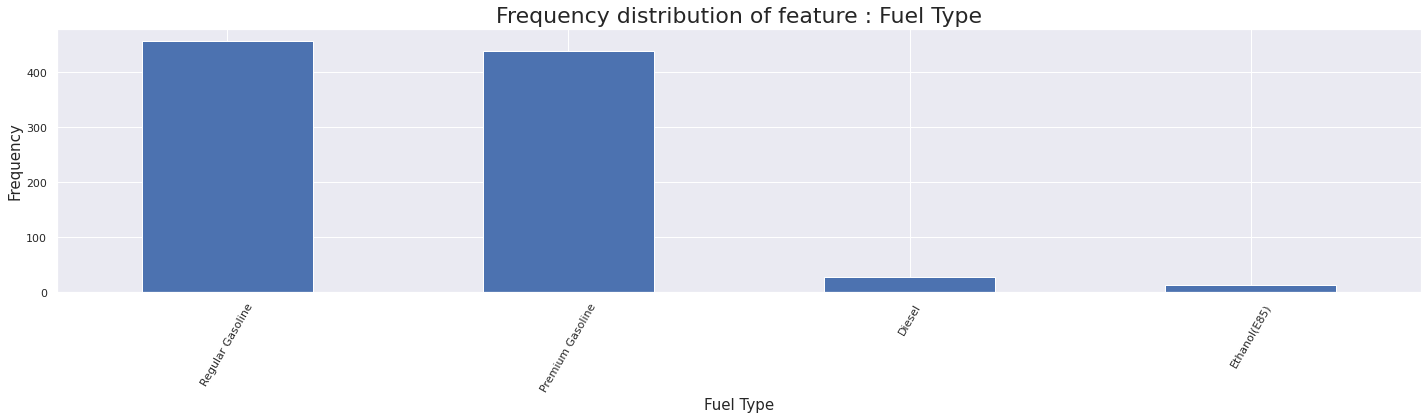

In [ ]:
print("Fuel Type")
print(tabulate(pd.DataFrame(train_data['Fuel Type'].value_counts())))

plt.figure(figsize=(20,6))

train_data.groupby("Fuel Type")["Fuel Type"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Frequency distribution of feature : Fuel Type", fontsize=22)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Fuel Type", fontsize=15)
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

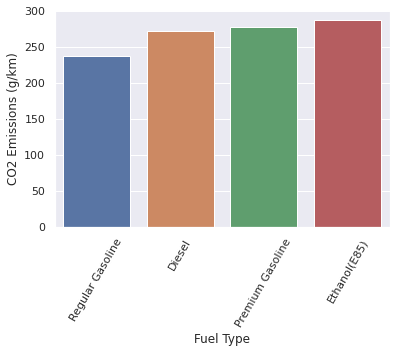

In [ ]:
OrderedData = train_data.groupby(['Fuel Type'])['CO2 Emissions (g/km)'].mean().sort_values().reset_index()
sns.barplot(x= 'Fuel Type',y='CO2 Emissions (g/km)',data= OrderedData)
plt.xticks(rotation=60)


Cylinders
--  ---
 4  407
 6  265
 8  213
12   21
 3   18
10    8
16    2
 5    1
--  ---


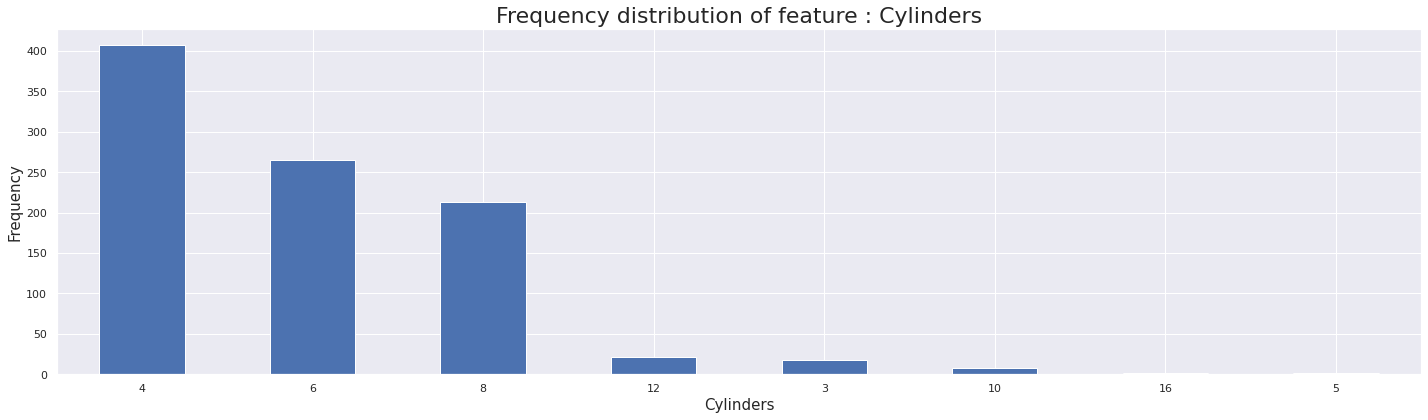

In [ ]:
print("Cylinders")
print(tabulate(pd.DataFrame(train_data['Cylinders'].value_counts())))

plt.figure(figsize=(20,6))

train_data.groupby("Cylinders")["Cylinders"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Frequency distribution of feature : Cylinders", fontsize=22)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Cylinders", fontsize=15)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

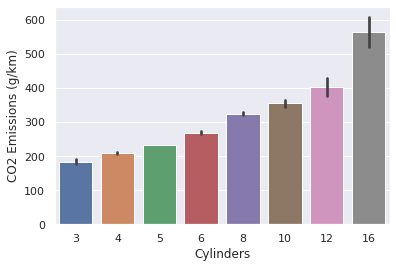

In [ ]:
sns.barplot(x= 'Cylinders',y= 'CO2 Emissions (g/km)', data= train_data)

In [ ]:
stats_ = train_data.describe().T.drop(["count"], axis=1)
stats_ = pd.concat([stats_, train_data.skew()], axis=1)
stats_.columns = ["mean", "std", "min", "25%", "median", "75%", "max", "skew"]
cols = ["mean", "25%", "median", "75%", "std", "skew", "min", "max"]
stats_ = stats_[cols]
print(tabulate(stats_, headers="keys", floatfmt=".2f"))

                                     mean      25%    median      75%    std    skew      min      max
--------------------------------  -------  -------  --------  -------  -----  ------  -------  -------
Model                             2021.00  2021.00   2021.00  2021.00   0.00    0.00  2021.00  2021.00
Engine Size (L)                      3.21     2.00      3.00     4.00   1.39    0.88     1.00     8.00
Cylinders                            5.72     4.00      6.00     8.00   1.98    1.13     3.00    16.00
Fuel Consumption City (L/100 km)    12.50    10.10     12.00    14.80   3.49    0.75     4.00    30.30
Fuel Consumption Hwy (L/100 km)      9.31     7.70      9.00    10.80   2.22    0.67     3.90    20.90
Fuel Consumption Comb (L/100 km)    11.06     9.10     10.70    13.10   2.87    0.69     4.00    26.10
Smog Rating                          4.73     3.00      5.00     6.00   1.71   -0.49     1.00     7.00
CO2 Emissions (g/km)               258.53   213.00    255.00   303.50  64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


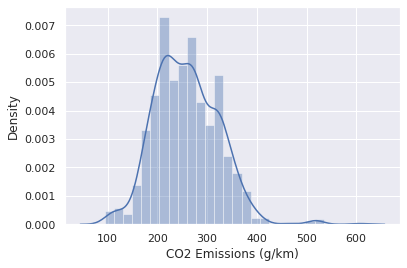

In [ ]:
sns.distplot(train_data['CO2 Emissions (g/km)'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Attempting to set identical left == right == 2021 results in singular transformations; automatically expanding.
  


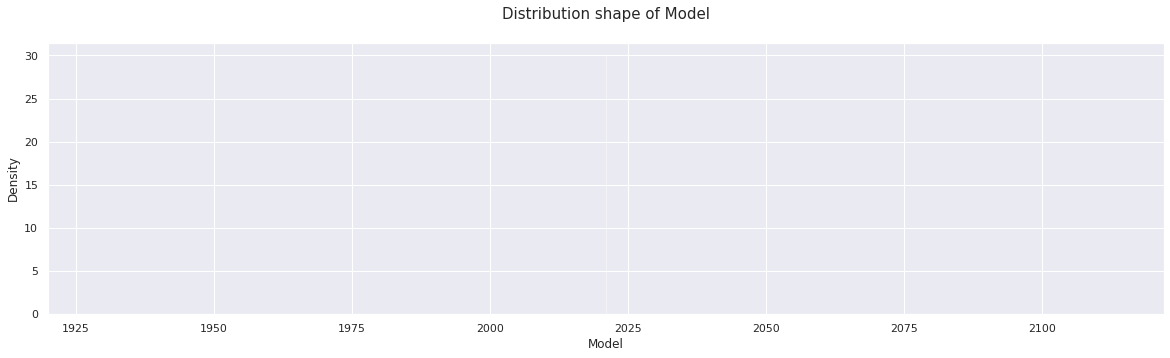

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


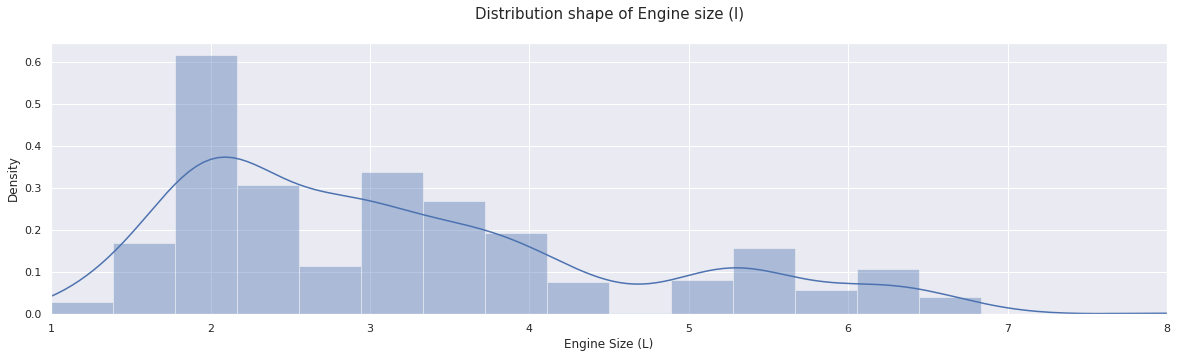

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


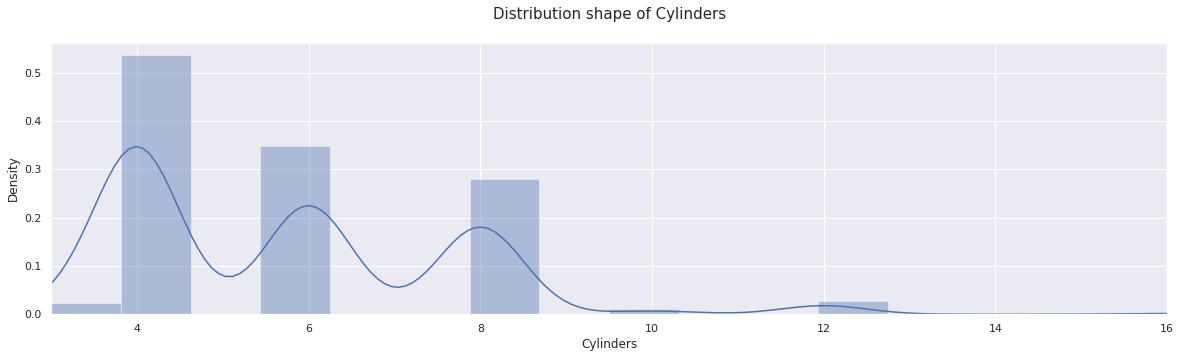

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


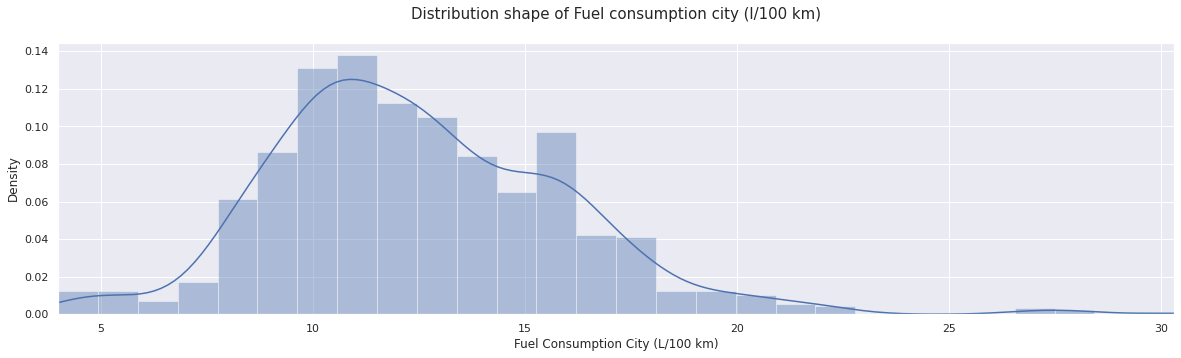

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


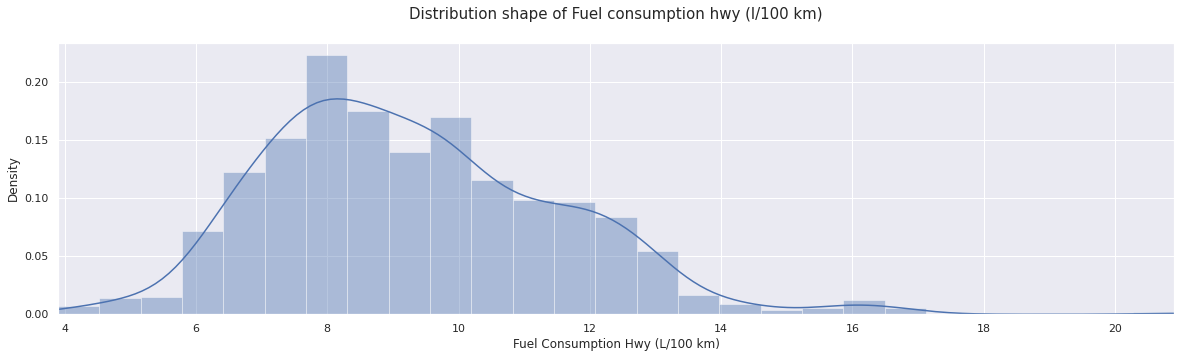

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


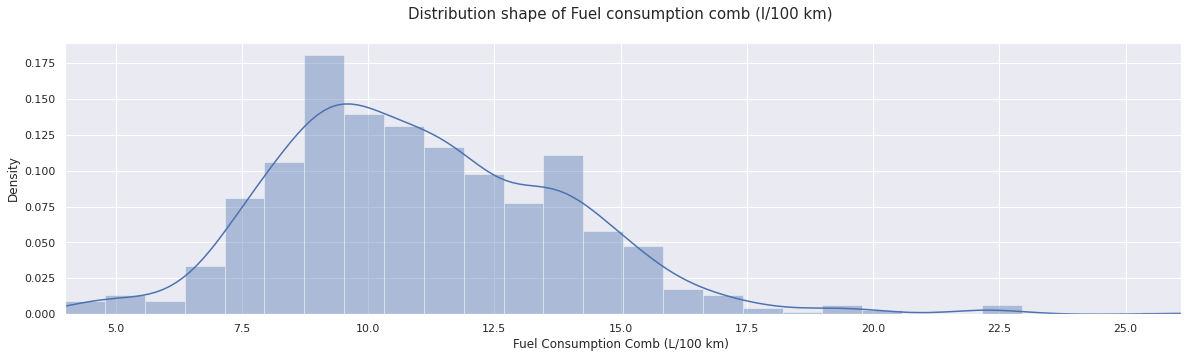

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


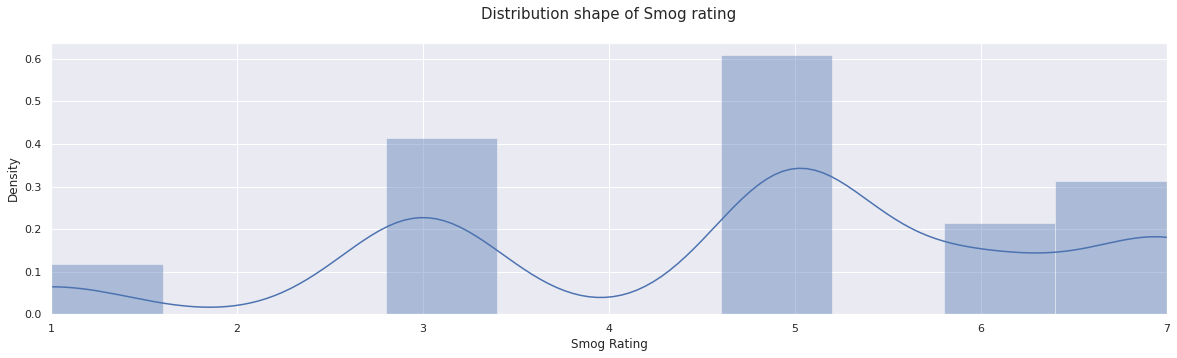

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


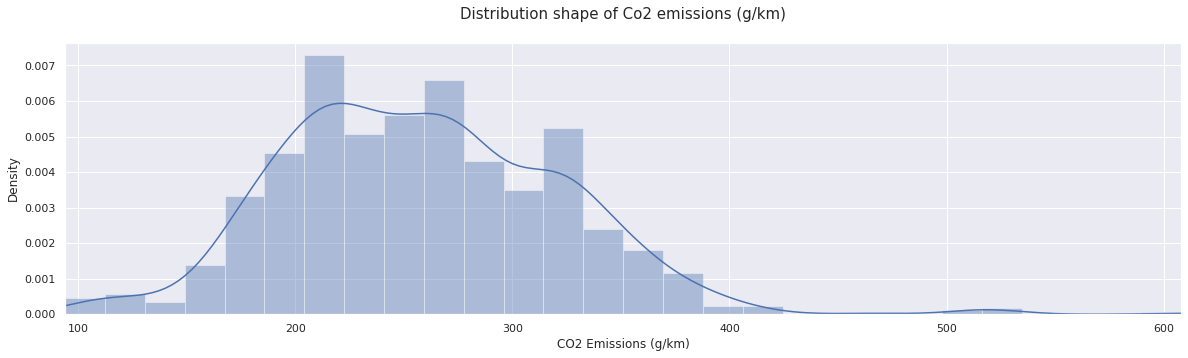

In [ ]:
for feature in train_data.select_dtypes("number").columns:

    plt.figure(figsize=(20,5))
    #sns.distplot(train_data[feature], hist_kws={"rwidth": 0.9})
    sns.distplot(train_data[feature])
    plt.xlim(train_data[feature].min(), train_data[feature].max())
    plt.title(f"Distribution shape of {feature.capitalize()}\n", fontsize=15)
  #  plt.tight_layout()
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'CO2 Emissions (g/km)\n')

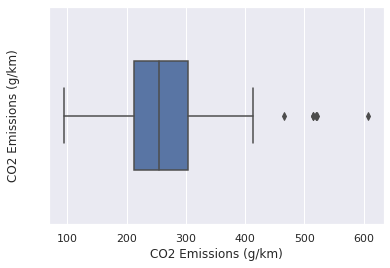

In [ ]:
sns.boxplot('CO2 Emissions (g/km)', data= train_data, width=0.5)
plt.ylabel("CO2 Emissions (g/km)\n", rotation=90)

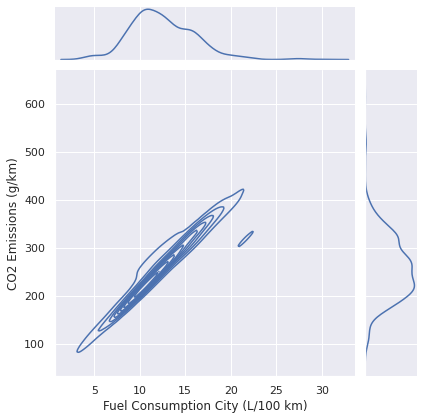

In [ ]:
sns.jointplot(data= train_data , x = train_data['Fuel Consumption City (L/100 km)'], y= train_data['CO2 Emissions (g/km)'],kind="kde" )

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression, LassoLars, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

from keras.models import Sequential
from keras.layers import Dense

Read CO2 Emissions Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/Artificial Intelligence/Project')
data2021 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Artificial Intelligence/Project/CarCO2Emissions.csv')
data2017 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Artificial Intelligence/Project/2017.csv')
data2018 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Artificial Intelligence/Project/2018.csv')
data2019 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Artificial Intelligence/Project/2019.csv')
data2020 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Artificial Intelligence/Project/2020.csv')
data2022 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Artificial Intelligence/Project/2022.csv')
data2021.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Model,Make,CarModel,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Smog Rating,CO2 Emissions (g/km)
0,2021,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,3,199
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,3,256
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,6,232
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,6,242
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,7,230


Understanding the table

Model
4WD/4X4 = Four-wheel drive
AWD = All-wheel drive
FFV = Flexible-fuel vehicle
SWB = Short wheelbase
LWB = Long wheelbase
EWB = Extended wheelbase

Transmission
A = automatic
AM = automated manual
AS = automatic with select shift
AV = continuously variable
M = manual

3 ÔøΩ 10 = Number of gears

Fuel type
X = regular gasoline
Z = premium gasoline
D = diesel
E = ethanol (E85)
N = natural gas

Fuel consumption
City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)
CO2 emissions
the tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving

CO2 rating
the tailpipe emissions of carbon dioxide rated on a scale from 1 (worst) to 10 (best)

Smog rating
the tailpipe emissions of smog-forming pollutants rated on a scale from 1 (worst) to 10 (best)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

**IMPORTANT** make sure to set the the below parameters

with_categorical: default should be True
*   False: Will select nurmerical data only
*   True: Will select nurmerical and categorical data

with_fuel: default should be True
*   False: Will remove fuel consumption features
*   True: Will leave the fuel consumption features

iterations_num: iterations to test the data of different datasets over the trained model

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [ ]:
with_categorical = True
with_fuel = True
iterations_num = 1

We noticed that transmission can be splited into 2 columns transmission and gear number

In [ ]:
def split_transmission(d):
  result = d.transmission.str.extract('([a-zA-Z]+)([^a-zA-Z]+)', expand=True)
  result.columns = ['transmission','gear']
  df = d.drop(['transmission'], axis= 1)
  df.insert(loc=6, column='transmission', value=result['transmission'])
  df.insert(loc=7, column='gear', value=result['gear'])
  df['gear'] = pd.to_numeric(df['gear'])
  return df

Select numeric features

In [ ]:
def select_numeric(df):
  Numerical = df.select_dtypes(include = ['int64','float'])
  numerical_df = pd.DataFrame(StandardScaler().fit_transform(Numerical), columns = Numerical.columns)
  return numerical_df

Select categorical features

Modifying the data to take into consideration the categorical data (Qualitative) using OneHot Encoder

Encode categorical features as a one-hot numeric array.

The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features. The features are encoded using a one-hot (aka ‘one-of-K’ or ‘dummy’) encoding scheme. This creates a binary column for each category and returns a sparse matrix or dense array (depending on the sparse parameter)

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [ ]:
def select_categorical(df):
  Categorical = df.select_dtypes(include=['category','object'])
  Categorical = Categorical.loc[:,['class','transmission','fueltype']]
  Categorical = Categorical.applymap(lambda s: s.lower() if type(s) == str else s)
  encoder = OneHotEncoder(drop='first', sparse=False)
  categorical_df = pd.DataFrame(encoder.fit_transform(Categorical), columns=encoder.get_feature_names_out(Categorical.columns))
  return categorical_df

Clean the data from any bad values

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), 'Data frame required'
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

Data Preprocessing

In [ ]:
def preprocess(df):
  df= df.drop_duplicates()
  df.columns = ['year','make','model','class','engine','cylinders','transmission',
              'fueltype', 'consumpcity', 'consumphwy', 'consumpcomb',
              'smog', 'emissions']
  df = split_transmission(df)
  df = df.drop(['gear', 'year', 'smog'], axis= 1)
  data = select_numeric(df)
  data = clean_dataset(data)
  if(with_categorical):
    categorical_df = select_categorical(df)
    data = pd.concat([categorical_df, data], axis = 1)
  return data

Select only the columns available in dataframe X

In [ ]:
def common_columns(dfX, df):
  df = pd.DataFrame(df, columns = dfX.columns)
  df = df.fillna(0)
  return df

Datasets preprocessing

In [ ]:
df2017 = preprocess(data2017)
df2018 = preprocess(data2018)
df2019 = preprocess(data2019)
df2020 = preprocess(data2020)
df2022 = preprocess(data2022)

df2021 = preprocess(data2021)


In [ ]:
X_data = []
y_data = []

In [ ]:
def select_features(df, X):
  X_new = df.drop(['emissions'], axis= 1)
  if(with_fuel == False):
    X_new = X_new.drop(['consumpcity'], axis= 1)
    X_new = X_new.drop(['consumphwy'], axis= 1)
    X_new = X_new.drop(['consumpcomb'], axis= 1)
  X_new = common_columns(X, X_new)
  y_new = df["emissions"]
  X_data.append(X_new)
  y_data.append(y_new)

Set X and y

In [ ]:
X = df2021.drop(['emissions'], axis= 1)
if(with_fuel == False):
  X = X.drop(['consumpcity'], axis= 1)
  X = X.drop(['consumphwy'], axis= 1)
  X = X.drop(['consumpcomb'], axis= 1)
y = df2021["emissions"]

select_features(df2017, X)
select_features(df2018, X)
select_features(df2019, X)
select_features(df2020, X)
select_features(df2022, X)

Split data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Evaluate a score by cross-validation.

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test. Note that the word “experiment” is not intended to denote academic use only, because even in commercial settings machine learning usually starts out experimentally. Here is a flowchart of typical cross validation workflow in model training. The best parameters can be determined by grid search techniques.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html?highlight=cross_val_score#sklearn.model_selection.cross_val_score

In [ ]:
names_all = []
test_acc_all = []
r2_all = []
rmse_all = []
cross_score_all = []

names_all_test = []
test_acc_all_test = []
r2_all_test = []
rmse_all_test = []
cross_score_all_test = []

In [ ]:
def test_prediction(reg, X_train, X_test, y_train, y_test, X, y, label, iterations):
  test_acc = []
  r2 = []
  rmse = []
  cross_score = []

  y_pred = reg.predict(X_test)

  reg_train_acc = reg.score(X_train, y_train)
  reg_test_acc = reg.score(X_test, y_test)
  reg_r2 = r2_score(y_test, y_pred)
  reg_rmse = mean_squared_error(y_test, y_pred, squared = False)
  reg_cross_score = cross_val_score(reg, X, y, cv=5).mean()

  names_all.append(label)
  test_acc_all.append(reg_test_acc)
  r2_all.append(reg_r2)
  rmse_all.append(reg_rmse)
  cross_score_all.append(reg_cross_score)

  print('+++++++++++++++++++++', label, '+++++++++++++++++++++++')
  print(label, 'Training Accuracy:', reg_train_acc)
  print(label, 'Testing Accuracy:', reg_test_acc)
  print(label, 'R2 Score: ', reg_r2)
  print(label, 'RMSE:', reg_rmse)
  print(label, 'Cross Validation:' , reg_cross_score)

  if(iterations > 0):
    for i in range(len(X_data)):
      dataset_X = X_data[i]
      dataset_y = y_data[i]
      for x in range(iterations):
        dataset_X_train, dataset_X_test, dataset_y_train, dataset_y_test = train_test_split(dataset_X, dataset_y, test_size=0.25, random_state=42, shuffle = True)
        dataset_y_pred = reg.predict(dataset_X_test)

        reg_test_acc = reg.score(dataset_X_test, dataset_y_test)
        reg_r2 = r2_score(dataset_y_test, dataset_y_pred)
        reg_rmse = mean_squared_error(dataset_y_test, dataset_y_pred, squared = False)
        reg_cross_score = cross_val_score(reg, dataset_X, dataset_y, cv=5).mean()

        test_acc.append(reg_test_acc)
        r2.append(reg_r2)
        rmse.append(reg_rmse)
        cross_score.append(reg_cross_score)

    names_all_test.append(label)
    test_acc_all_test.append(np.mean(test_acc))
    r2_all_test.append(np.mean(r2))
    rmse_all_test.append(np.mean(rmse))
    cross_score_all_test.append(np.mean(cross_score))

    print('________ Scores with', iterations, 'iterations over other datasets ____')
    print(label, 'Testing Accuracy:',  np.mean(test_acc))
    print(label, 'R2 Score:', np.mean(r2))
    print(label, 'RMSE:', np.mean(rmse))
    print(label, 'Cross Validation:' , np.mean(cross_score))
    print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

Training and testing the model using multiple regressors

Ridge

*   Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients.

StandardScaler

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

with_mean = bool, default=True
If True, center the data before scaling. This does not work (and will raise an exception) when attempted on sparse matrices, because centering them entails building a dense matrix which in common use cases is likely to be too large to fit in memory.

*   Lasso Lars

*   Random Forest Regressor

random_state = int, RandomState instance or None, default=None
Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features)

*   Decision Tree Regressor











In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

ridge = make_pipeline(StandardScaler(with_mean=False), Ridge())
ridge= ridge.fit(X_train,y_train)

lasso_lars_reg = LassoLars(alpha=0.5, normalize=False)
lasso_lars_reg.fit(X_train,y_train)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

dtr = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

all_reg = [lin_reg, ridge, lasso_lars_reg, rf, dtr]
all_reg_names = ['Linear Regression', 'Ridge', 'Lasso Lars', 'Random Forest', 'Decision Tree']

In [ ]:
print('Categorical data is set to =', with_categorical)
print('Fuel data is set to =', with_fuel)
print('Iterations set to =', iterations_num)
for i in range(len(all_reg)):
  test_prediction(all_reg[i],X_train, X_test, y_train, y_test, X, y, all_reg_names[i], iterations_num)

Categorical data is set to = True
Fuel data is set to = True
Iterations set to = 1
+++++++++++++++++++++ Linear Regression +++++++++++++++++++++++
Linear Regression Training Accuracy: 0.9983880822294794
Linear Regression Testing Accuracy: 0.9973482509027247
Linear Regression R2 Score:  0.9973482509027247
Linear Regression RMSE: 0.04946448702607525
Linear Regression Cross Validation: 0.9960914186648081
________ Scores with 1 iterations over other datasets ____
Linear Regression Testing Accuracy: 0.9921979119512315
Linear Regression R2 Score: 0.9921979119512315
Linear Regression RMSE: 0.08394322992072548
Linear Regression Cross Validation: 0.9957041768815774
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++ Ridge +++++++++++++++++++++++
Ridge Training Accuracy: 0.9983706141644414
Ridge Testing Accuracy: 0.9973479526651329
Ridge R2 Score:  0.9973479526651329
Ridge RMSE: 0.04946726854012258
Ridge Cross Validation: 0.9961279716973473
________ Scores with 1 ite

Calculate difference in % between all algorithms

In [ ]:
def calculate_percent(a,b):
  return (b - a)/a * 100

In [ ]:
percent_names_all = []
percent_test_acc_all = []
percent_r2_all = []
percent_rmse_all = []
percent_cross_score_all = []

percent_test_acc_all_test = []
percent_r2_all_test = []
percent_rmse_all_test = []
percent_cross_score_all_test = []

for i in range(len(all_reg_names)):
  if(i != 0):
    percent_names_all.append(all_reg_names[i])
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++')
    percent = calculate_percent(r2_all[0], r2_all[i])
    percent_r2_all.append(percent)
    print(all_reg_names[i], 'R2 Score', "{:.2f}".format(percent), '% | The lower the better')
    percent = calculate_percent(rmse_all[0], rmse_all[i])
    percent_rmse_all.append(percent)
    print(all_reg_names[i], 'RMSE Score', "{:.2f}".format(percent), '% | The lower the better' )
    percent = calculate_percent(cross_score_all[0], cross_score_all[i])
    percent_cross_score_all.append(percent)
    print(all_reg_names[i], 'Cross Val', "{:.2f}".format(percent), '% | The higher the better' )
    percent = calculate_percent(test_acc_all[0], test_acc_all[i])
    percent_test_acc_all.append(percent)
    print(all_reg_names[i], 'Test Score', "{:.2f}".format(percent), '% | The higher the better' )
    print('+++++++++++++ Other Datasets',iterations_num, 'Iterations ++++++++++++++++++')
    percent = calculate_percent(r2_all_test[0], r2_all_test[i])
    percent_r2_all_test.append(percent)
    print(all_reg_names[i], 'R2 Score', "{:.2f}".format(percent), '% | The lower the better')
    percent = calculate_percent(rmse_all_test[0], rmse_all_test[i])
    percent_rmse_all_test.append(percent)
    print(all_reg_names[i], 'RMSE Score', "{:.2f}".format(percent), '% | The lower the better' )
    percent = calculate_percent(cross_score_all_test[0], cross_score_all_test[i])
    percent_cross_score_all_test.append(percent)
    print(all_reg_names[i], 'Cross Val', "{:.2f}".format(percent), '% | The higher the better' )
    percent = calculate_percent(test_acc_all_test[0], test_acc_all_test[i])
    percent_test_acc_all_test.append(percent)
    print(all_reg_names[i], 'Test Score', "{:.2f}".format(percent), '% | The higher the better' )
    print('________________________________________________________')

+++++++++++++++++++++++++++++++++++++++++++++++++++
Ridge R2 Score -0.00 % | The lower the better
Ridge RMSE Score 0.01 % | The lower the better
Ridge Cross Val 0.00 % | The higher the better
Ridge Test Score -0.00 % | The higher the better
+++++++++++++ Other Datasets 1 Iterations ++++++++++++++++++
Ridge R2 Score -0.00 % | The lower the better
Ridge RMSE Score -0.05 % | The lower the better
Ridge Cross Val 0.00 % | The higher the better
Ridge Test Score -0.00 % | The higher the better
________________________________________________________
+++++++++++++++++++++++++++++++++++++++++++++++++++
Lasso Lars R2 Score -30.23 % | The lower the better
Lasso Lars RMSE Score 971.04 % | The lower the better
Lasso Lars Cross Val -34.61 % | The higher the better
Lasso Lars Test Score -30.23 % | The higher the better
+++++++++++++ Other Datasets 1 Iterations ++++++++++++++++++
Lasso Lars R2 Score -31.99 % | The lower the better
Lasso Lars RMSE Score 575.80 % | The lower the better
Lasso Lars Cross 

Scores

In [ ]:
all_scores = pd.DataFrame({
    'Name' : names_all,
    'R2 Score' : r2_all,
    'RMSE' : rmse_all,
    'Cross Val' : cross_score_all,
    'Test Score' : test_acc_all
})

all_test_scores = pd.DataFrame({
    'Name' : names_all_test,
    'R2 Score' : r2_all_test,
    'RMSE' : rmse_all_test,
    'Cross Val' : cross_score_all_test,
    'Test Score' : test_acc_all_test
})

percent_all_scores = pd.DataFrame({
    'Name' : percent_names_all,
    'R2 Score' : percent_r2_all,
    'RMSE' : percent_rmse_all,
    'Cross Val' : percent_cross_score_all,
    'Test Score' : percent_test_acc_all
})

percent_all_test_scores = pd.DataFrame({
    'Name' : percent_names_all,
    'R2 Score' : percent_r2_all_test,
    'RMSE' : percent_rmse_all_test,
    'Cross Val' : percent_cross_score_all_test,
    'Test Score' : percent_test_acc_all_test
})


This will save the results to CSV files

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Artificial Intelligence/Project/data/'
all_scores_csv = path + 'all_scores_' + str(with_categorical) + '_' + str(with_fuel) + '_' + str(iterations_num) + '.csv'
all_test_scores_csv = path + 'all_test_scores_' + str(with_categorical) + '_' + str(with_fuel) + '_' + str(iterations_num) + '.csv'
percent_all_scores_csv = path + 'percent_all_scores_' + str(with_categorical) + '_' + str(with_fuel) + '_' + str(iterations_num) + '.csv'
percent_all_test_scores_csv = path + 'percent_all_test_scores_' + str(with_categorical) + '_' + str(with_fuel) + '_' + str(iterations_num) + '.csv'

all_scores.to_csv(all_scores_csv, sep=',')
all_test_scores.to_csv(all_test_scores_csv, sep=',')
percent_all_scores.to_csv(percent_all_scores_csv, sep=',')
percent_all_test_scores.to_csv(percent_all_test_scores_csv, sep=',')

(0.0, 1.0)

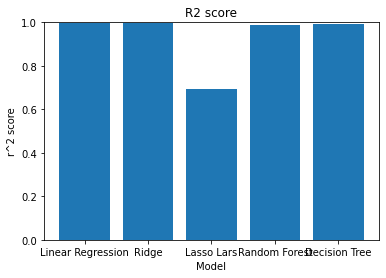

In [ ]:
plt.title('R2 score')
plt.bar(all_scores['Name'], all_scores['R2 Score'])
plt.xlabel('Model')
plt.ylabel('r^2 score')
plt.ylim(0, 1)

(0.0, 1.0)

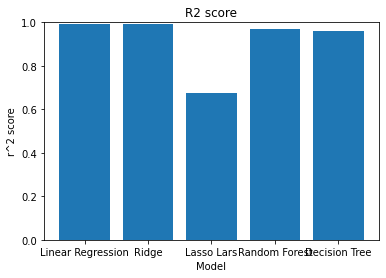

In [ ]:
plt.title('R2 score')
plt.bar(all_test_scores['Name'], all_test_scores['R2 Score'])
plt.xlabel('Model')
plt.ylabel('r^2 score')
plt.ylim(0, 1)

Mean square error (MSE) is the average of the square of the errors. The larger the number the larger the error

Mean squared error regression loss.
The mean_squared_error function computes mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html


R2 (coefficient of determination) regression score function.

Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R2 score of 0.0.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

(0.0, 1.0)

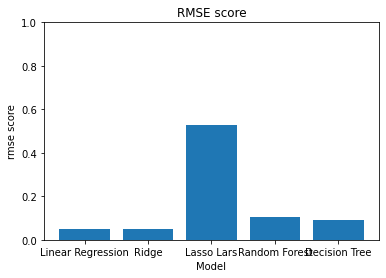

In [ ]:
plt.title('RMSE score')
plt.bar(all_scores['Name'], all_scores['RMSE'])
plt.xlabel('Model')
plt.ylabel('rmse score')
plt.ylim(0, 1)

(0.0, 1.0)

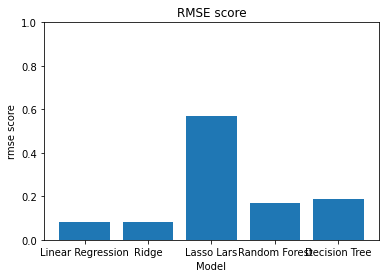

In [ ]:
plt.title('RMSE score')
plt.bar(all_test_scores['Name'], all_test_scores['RMSE'])
plt.xlabel('Model')
plt.ylabel('rmse score')
plt.ylim(0, 1)

(0.0, 1.0)

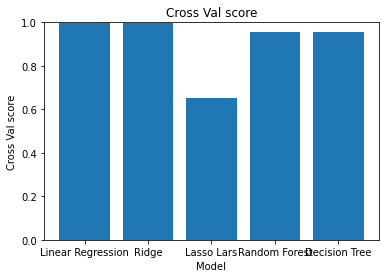

In [ ]:
plt.title('Cross Val score')
plt.bar(all_scores['Name'], all_scores['Cross Val'])
plt.xlabel('Model')
plt.ylabel('Cross Val score')
plt.ylim(0, 1)

(0.0, 1.0)

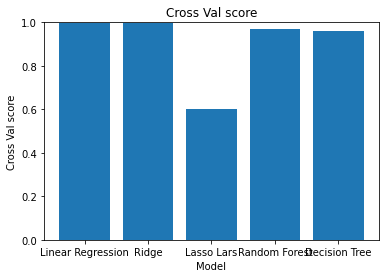

In [ ]:
plt.title('Cross Val score')
plt.bar(all_test_scores['Name'], all_test_scores['Cross Val'])
plt.xlabel('Model')
plt.ylabel('Cross Val score')
plt.ylim(0, 1)

(0.0, 1.0)

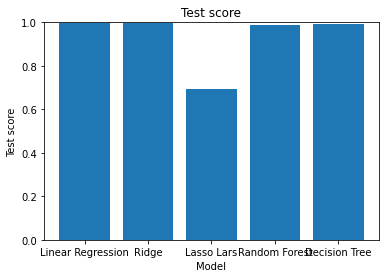

In [ ]:
plt.title('Test score')
plt.bar(all_scores['Name'], all_scores['Test Score'])
plt.xlabel('Model')
plt.ylabel('Test score')
plt.ylim(0, 1)

(0.0, 1.0)

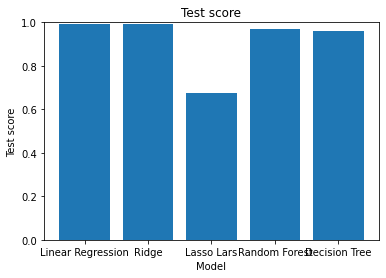

In [ ]:
plt.title('Test score')
plt.bar(all_test_scores['Name'], all_test_scores['Test Score'])
plt.xlabel('Model')
plt.ylabel('Test score')
plt.ylim(0, 1)

Text(0.5, 0, 'Variable Significance Levels')

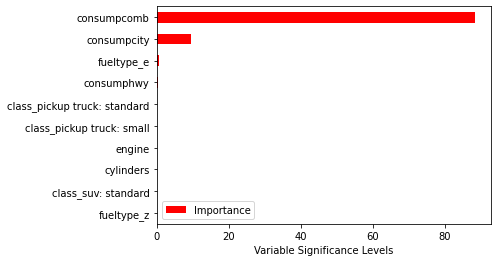

In [ ]:
importance = pd.DataFrame({"Importance": rf.feature_importances_*100},index = X.columns).nlargest(n=10, columns=['Importance'])
importance = importance.sort_values(by = "Importance",axis = 0,ascending = True)
importance.plot(kind ="barh", color = "r")

plt.xlabel("Variable Significance Levels")

______________________________________________________________________

______________________________________________________________________